In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\varsha\OneDrive\Desktop\New folder\Project\crime_safety_dataset.csv")
df

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic


In [4]:
df.describe()

,id,victim_age
count,1000.000000,1000.000000
mean,500.500000,52.201000
std,288.819436,22.913831
min,1.000000,12.000000
25%,250.750000,33.000000
50%,500.500000,53.000000
75%,750.250000,72.000000
max,1000.000000,90.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [6]:
df.isnull().sum()

id                      0
date                    0
time                    0
crime_type              0
city                    0
state                   0
location_description    0
victim_age              0
victim_gender           0
victim_race             0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race'],
      dtype='object')

In [9]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


# Data Visualization

## Top 10 most Common Crime Type

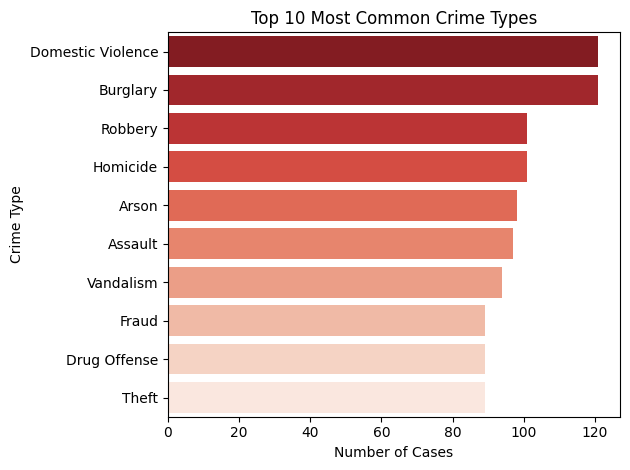

In [10]:
# plt.figure(figsize=(10,6))
crime_counts = df['crime_type'].value_counts().head(10)
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette='Reds_r')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

## Top 15 States by No. of Crimes

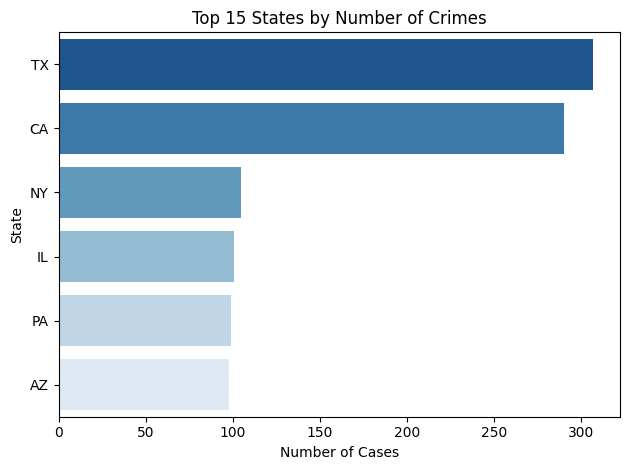

In [11]:
#plt.figure(figsize=(12,6))
state_counts = df['state'].value_counts().head(15)
sns.barplot(x=state_counts.values, y=state_counts.index, palette='Blues_r')
plt.title('Top 15 States by Number of Crimes')
plt.xlabel('Number of Cases')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Crime frequency by hour of day

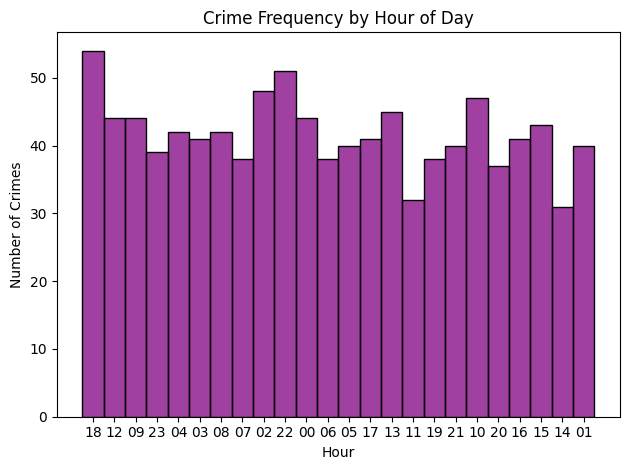

In [12]:
df['hour']=df['time'].str.split(':').str[0]
df['minute']=df['time'].str.split(':').str[1]

sns.histplot(df['hour'], bins=24, kde=False, color='purple')
plt.title('Crime Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

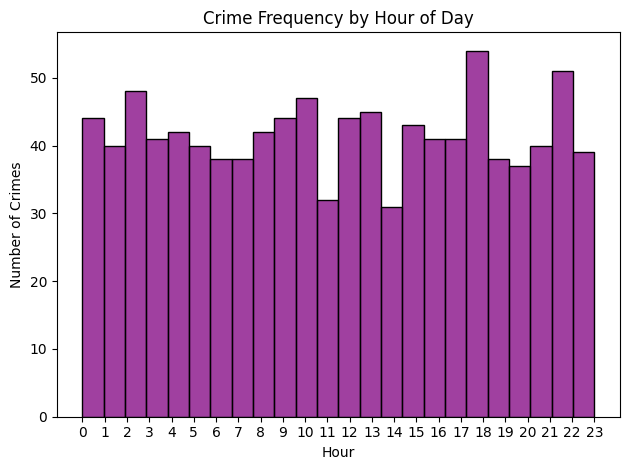

In [14]:
# Extract hour from time column
df['hour'] = pd.to_datetime(df['time']).dt.hour

#plt.figure(figsize=(10,6))
sns.histplot(df['hour'].dropna(), bins=24, kde=False, color='purple')
plt.title('Crime Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## Victim Gender Distribution

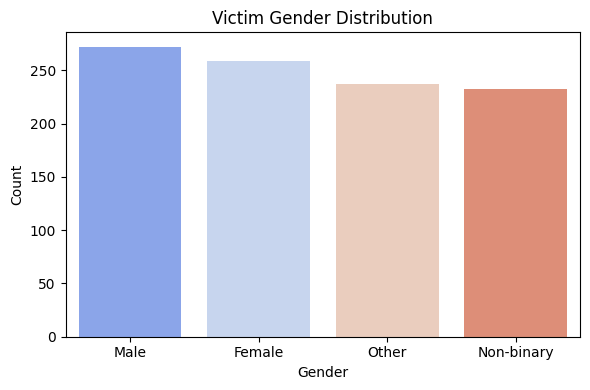

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='victim_gender', palette='coolwarm')
plt.title('Victim Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Victim Race Distribution

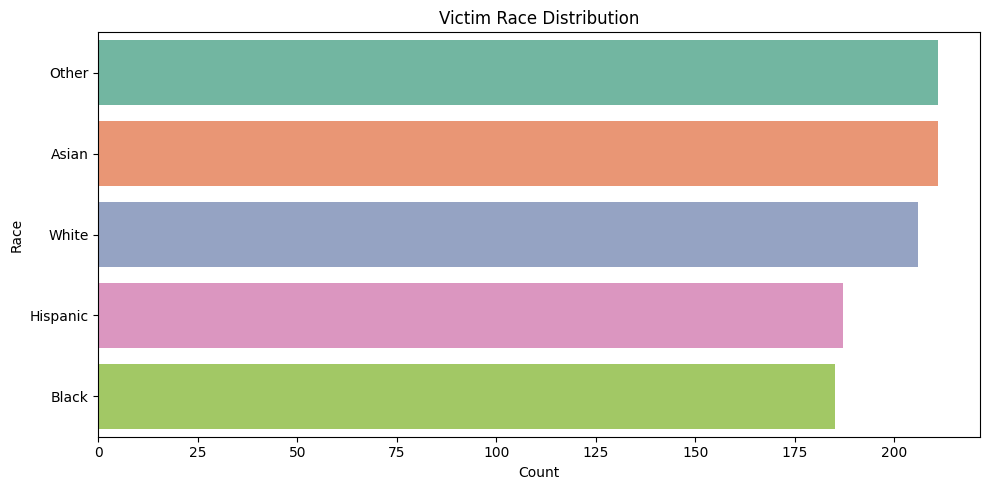

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='victim_race', order=df['victim_race'].value_counts().index, palette='Set2')
plt.title('Victim Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

## Victim Age Distribution

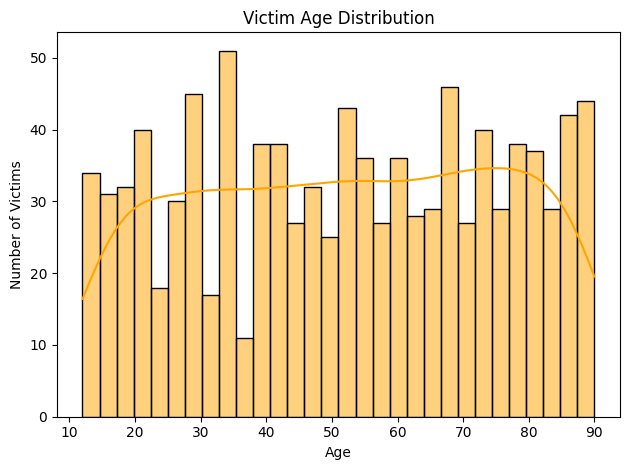

In [18]:
#plt.figure(figsize=(10,6))
sns.histplot(df['victim_age'], bins=30, kde=True, color='orange')
plt.title('Victim Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.tight_layout()
plt.show()

## Top 10 cities with highest crime reports

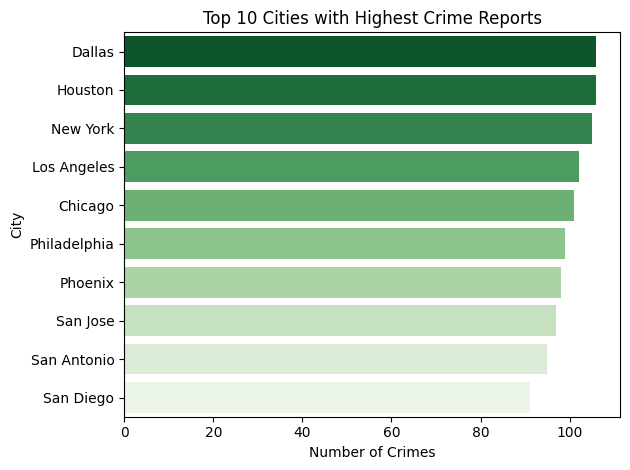

In [16]:
#plt.figure(figsize=(12,6))
city_counts = df['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette='Greens_r')
plt.title('Top 10 Cities with Highest Crime Reports')
plt.xlabel('Number of Crimes')
plt.ylabel('City')
plt.tight_layout()
plt.show()

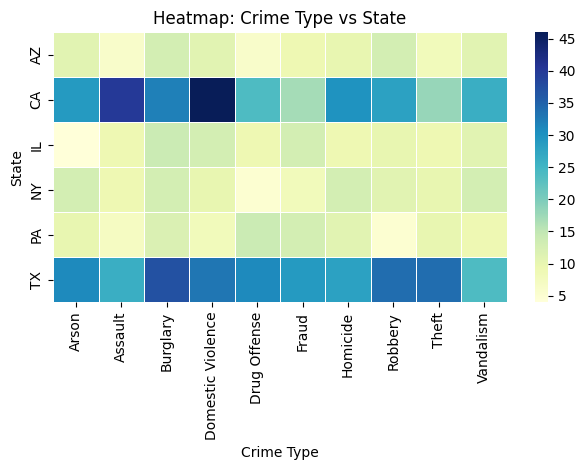

In [18]:
top_crimes = df['crime_type'].value_counts().nlargest(10).index
filtered_df = df[df['crime_type'].isin(top_crimes)]

pivot_table = pd.crosstab(filtered_df['state'], filtered_df['crime_type'])

#plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Crime Type vs State')
plt.xlabel('Crime Type')
plt.ylabel('State')
plt.tight_layout()
plt.show()